In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
import seaborn as sn

In [39]:
iris=load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [40]:
X = iris.data
Y = iris.target
N = len(X) // len(iris.target_names)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

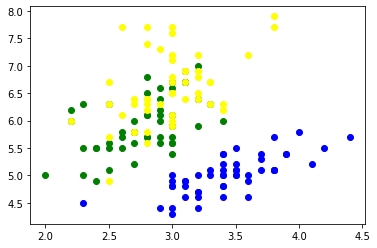

In [41]:
plt.scatter(X[0:N, 1], X[0:N, 0], c='blue', label='setosa')
plt.scatter(X[N:2*N, 1], X[N:2*N, 0], c='green', label='versicolor')
plt.scatter(X[2*N:3*N, 1], X[2*N:3*N, 0], c='yellow', label='virginica')

In [42]:
class KNearestNeighbors:
    def __init__(self, k):
        self.k = k
        
    #train
    def fit(self, X_train, Y_train):
        self.X_train = X_train
        self.Y_train = Y_train
        self.number_class = len(np.unique(Y_train))
        
    def nearestNeighbors(self, X_test):
        distance = np.sqrt(np.sum((X_test - self.X_train)**2, axis = 1))
        near_neighbor = np.argsort(distance)[0:self.k]
        return near_neighbor
    
    #test
    def predict(self, X_test):
        near_neighbor = self.nearestNeighbors(X_test)
        y = np.argmax(np.bincount(self.Y_train[near_neighbor]))
        return y
    
    def evaluate(self, x_test, y_test):
        y_pred = []
        for i in range(len(x_test)):
          y = knn.predict(x_test[i])
          y_pred.append(y)
        
        not_correct = abs(sum(y_pred - y_test))
        return (y_pred , Y_test), ((((len(y_pred) - not_correct)*100)/len(y_pred))/100)

In [43]:
K =[1 ,3 ,5 ,7 ,9 ,11 ,13 ,15]
result = []

for i in K:
  knn = KNearestNeighbors(i)
  knn.fit(X_train, Y_train)
  result.append([i, knn.evaluate(X_test, Y_test)[1]])

for j in result:
  print('k=',j[0], '  Accuracy=', j[1])


knn5 = KNearestNeighbors(5)
knn5.fit(X_train,Y_train)
res_y_pred = knn5.evaluate(X_test, Y_test)[0][0]
res_y_test = knn5.evaluate(X_test, Y_test)[0][1]

# confusion_matrix = confusion_matrix(res[0][0], res[0][1])

set_set = 0
set_ver = 0
set_vir = 0
vir_set = 0
vir_ver = 0
vir_vir = 0
ver_set = 0
ver_ver = 0
ver_vir = 0

k= 1   Accuracy= 0.9666666666666667
k= 3   Accuracy= 0.9666666666666667
k= 5   Accuracy= 0.9666666666666667
k= 7   Accuracy= 0.9666666666666667
k= 9   Accuracy= 1.0
k= 11   Accuracy= 1.0
k= 13   Accuracy= 1.0
k= 15   Accuracy= 0.9666666666666667


<AxesSubplot:>

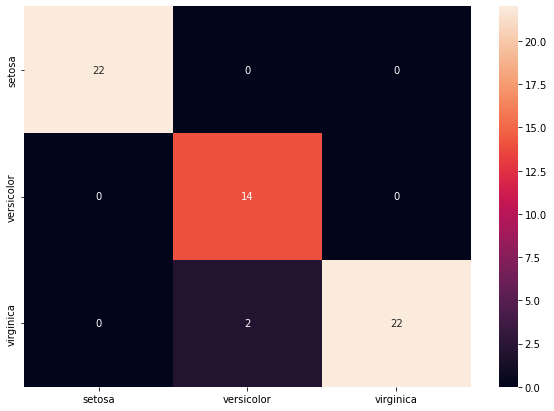

In [45]:
for i in range(len(res_y_pred)):
    if res_y_pred[i] == 0 and res_y_test[i] == 0:
        set_set += 1
    elif res_y_pred[i] == 1 and res_y_test[i] == 1:
        ver_ver += 1
    elif res_y_pred[i] == 2 and res_y_test[i] == 2:
        vir_vir += 1
    elif res_y_pred[i] == 0 and res_y_test[i] == 1:
        set_ver += 1
    elif res_y_pred[i] == 0 and res_y_test[i] == 2:
        set_vir += 1
    elif res_y_pred[i] == 2 and res_y_test[i] == 0:
        vir_set += 1
    elif res_y_pred[i] == 2 and res_y_test[i] == 1:
        vir_ver += 1
    elif res_y_pred[i] == 1 and res_y_test[i] == 0:
        ver_set += 1
    else:
        ver_vir += 1


result = np.array([[set_set,set_ver,set_vir],
                    [ver_set,ver_ver,ver_vir],
                    [vir_set,vir_ver,vir_vir]])

df_cm = pd.DataFrame(result, index = [i for i in ['setosa', 'versicolor', 'virginica']],
                  columns = [i for i in  ['setosa', 'versicolor', 'virginica']])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)